In [4]:
import torch
import torch.nn as nn
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import os

In [3]:
# load model
model = models.vgg16(pretrained=True)
# model.cuda()

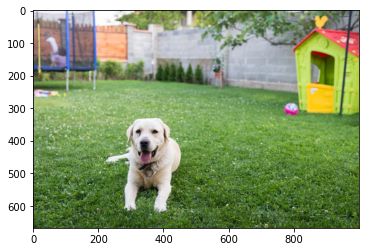

In [6]:
# Download image

if not os.path.exists("dog.jpg"):
    !wget -O ./dog.jpg https://www.greatpetcare.com/wp-content/uploads/sites/2/2020/03/backyard-dangers-main.jpg
    dog = Image.open("dog.jpg")

plt.imshow(dog)

In [7]:
# Pre-process image 
import torchvision.transforms as transform 

input_img_size = 224

image_transform = transform.Compose([transform.Resize((input_img_size,input_img_size)),
                                   transform.ToTensor(),
                                   transform.Normalize(mean=[0.485, 0.456, 0.406],
                                                        std=[0.229, 0.224, 0.225])])

img_tensor = image_transform(dog)
img_tensor = img_tensor.unsqueeze(0)
# img_tensor = img_tensor.cuda()
img_tensor.requires_grad_(True)

tensor([[[[ 1.9920,  1.9749,  1.7180,  ...,  0.1939,  0.0569, -0.0458],
          [ 1.8550,  1.8722,  1.5468,  ...,  0.1768,  0.0227, -0.0458],
          [ 1.5468,  1.5297,  1.1015,  ...,  0.1939, -0.0458, -0.0629],
          ...,
          [-1.1589, -1.5185, -1.3302,  ..., -0.9192, -1.0562, -1.0904],
          [-1.4500, -1.6042, -1.3987,  ..., -0.7479, -1.0562, -1.3130],
          [-1.5357, -1.6042, -1.4158,  ..., -0.9192, -0.8164, -1.3130]],

         [[ 2.1835,  2.1660,  1.9034,  ...,  0.5203,  0.3627,  0.2402],
          [ 2.0434,  2.0609,  1.7283,  ...,  0.4853,  0.3452,  0.2927],
          [ 1.7108,  1.6933,  1.2556,  ...,  0.4853,  0.3978,  0.4328],
          ...,
          [-0.5301, -0.8978, -0.6877,  ..., -0.3200, -0.4076, -0.3550],
          [-0.9328, -1.0728, -0.8277,  ..., -0.1625, -0.4601, -0.6352],
          [-1.0903, -1.1253, -0.8803,  ..., -0.3550, -0.2150, -0.6702]],

         [[ 2.4831,  2.4657,  2.2043,  ...,  1.1062,  0.8971,  0.7054],
          [ 2.3437,  2.3611,  

In [8]:
# Get gradients
model.eval()

# get the prediciton of the network
prediction = model(img_tensor)

# get the maximum prediction value
max_prediction = prediction.max()

# calculate the gradients by propagating back from this maximum value
max_prediction.backward()

# save the gradients from the input image tensor
img_gradients = img_tensor.grad.squeeze()

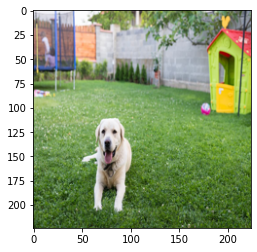

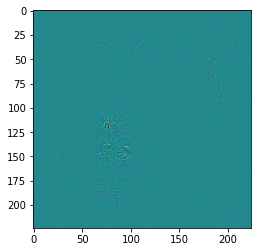

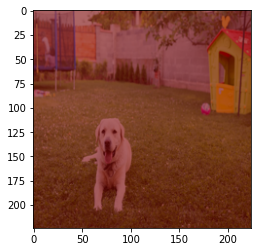

In [14]:
# get saliency map based on gradients, and visualize it
import numpy as np

# create a grayscale image from the gradients: 
#   - convert them to numpy
#   - summarize the values along the channel dimension
#   - normalize the values between [0,255]

saliency = img_gradients.numpy()
saliency = np.sum(saliency, axis=0)
saliency_ = saliency.clip(0, 255)
saliency_powered = (255 / np.max(saliency))

# show image and saliency map
plt.imshow(dog.resize((input_img_size,input_img_size)))
plt.show()
plt.imshow(saliency)
plt.show()

# bland image to saliency
saliency_image = np.zeros([input_img_size,input_img_size,3],dtype=np.uint8)
saliency_image[:,:,0] = saliency_powered
saliency_image[:,:,1] = 0
saliency_image[:,:,2] = 0

saliency_PIL = Image.fromarray(saliency_image)
result = Image.blend(dog.resize((input_img_size,input_img_size)),saliency_PIL, alpha=0.6)
plt.imshow(result)

In [15]:
np.max(saliency)

0.67788094